# 8-step tutorial of *primitiv*: solving the XOR problem #

## 1. Imports modules. ##

In [1]:
from graphviz import Source
import numpy as np

from primitiv import *
from primitiv import operators as F

## 2. Sets the default device and the default computation graph. ##

In [2]:
dev = devices.Naive(); Device.set_default(dev)
# if you want to activate CUDA backend, just replacing above to:
#def = devices.CUDA(gpuid); Device.set_default(dev)
g = Graph(); Graph.set_default(g)

## 3. Initializes parameters. ##

In [3]:
w1 = Parameter([8, 2], initializers.XavierUniform())
b1 = Parameter([8], initializers.Constant(0))
w2 = Parameter([1, 8], initializers.XavierUniform())
b2 = Parameter([1], initializers.Constant(0))

## 4. Initializes the trainer. ##

In [4]:
trainer = optimizers.SGD()
trainer.add_parameter(w1)
trainer.add_parameter(b1)
trainer.add_parameter(w2)
trainer.add_parameter(b2)

## 5. Prepares input/output samples. ##

In [5]:
# Input 1: list of ndarrays.
inputs = [
    np.array([ 1,  1]),  # 1st sample
    np.array([ 1, -1]),  # 2nd sample
    np.array([-1,  1]),  # 3rd sample
    np.array([-1, -1]),  # 4th sample
]

# Input 2: list of raw float values.
labels = [1, -1, -1, 1]

## 6. Defines the graph structure (as the function). ##

In [6]:
def build_graph():
    # Input
    # F.input() takes an ndarray, or a list of ndarrays.
    x = F.input(inputs)
    
    # Calculating outputs by 2-layer perceptron.
    h = F.tanh(F.parameter(w1) @ x + F.parameter(b1))
    y = F.tanh(F.parameter(w2) @ h + F.parameter(b2))
    
    # Ground truth
    # F.raw_input() takes a shape and a corresponding list of
    # raw float values with column-major order.
    t = F.raw_input(Shape([1], 4), labels)
    
    # Calculating loss by squared error.
    diff = y - t
    loss = F.batch.sum(diff * diff)
    
    return y, loss

## 7. Dumps the graph structure. ##

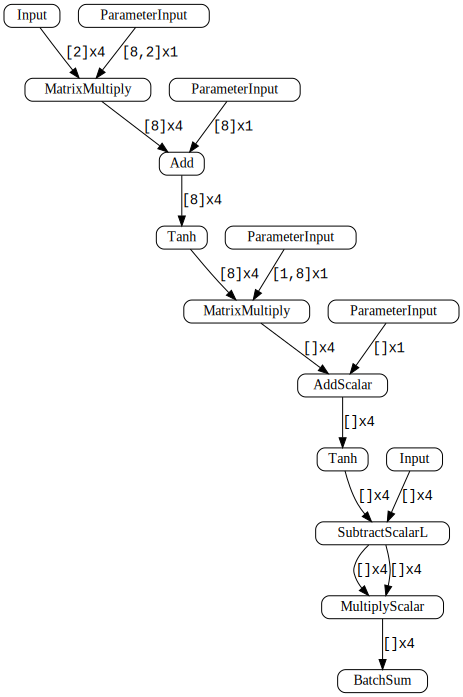

In [7]:
g.clear()
build_graph()
Source(g.dump("dot"))

## 8. Performs the training loop. ##

In [8]:
for i in range(20):
    # Constructs the graph.
    g.clear()
    y, loss = build_graph()
    
    # Calculates values
    y_vals = y.to_list()
    loss_val = loss.to_float()
    print("y =", "[" + ", ".join("%+.8f" % x for x in y_vals) + "]", ", loss =", "%.8f" % loss_val)
    
    # Train
    trainer.reset_gradients()
    loss.backward()
    trainer.update()

y = [-0.61339909, -0.23394600, +0.23394600, +0.61339909] , loss = 4.86197805
y = [-0.22889039, -0.06932333, -0.53593642, -0.21425165] , loss = 4.06609297
y = [+0.27250409, -0.25272337, +0.37463596, +0.32917529] , loss = 3.42730260
y = [+0.19238855, -0.07796110, -0.43207717, +0.05877838] , loss = 2.71082640
y = [+0.29339507, -0.39842471, +0.03626741, +0.41060734] , loss = 2.28241730
y = [+0.39863276, -0.11305720, -0.69823319, +0.16493824] , loss = 1.93670154
y = [+0.37555519, -0.63617033, -0.08534528, +0.59322888] , loss = 1.52435946
y = [+0.59360415, -0.23211496, -0.82383120, +0.32651529] , loss = 1.23942208
y = [+0.47169027, -0.73102200, -0.48567823, +0.65091115] , loss = 0.73785019
y = [+0.72777152, -0.55034208, -0.71488351, +0.61249226] , loss = 0.50775427
y = [+0.68653172, -0.70507240, -0.68368751, +0.67842233] , loss = 0.38871044
y = [+0.73128694, -0.69765669, -0.72570342, +0.71620476] , loss = 0.31939653
y = [+0.75017446, -0.72703147, -0.74771553, +0.73718238] , loss = 0.26964518